## GRIP @SPARKS FOUNDATION INTERNSHIP
## NAME : RUCHITA KAMBLE
## DATA SCIENCE & BUSINESS ANALYTICS INTERN
## Task 6: Exploratory Data Analysis ON GLOBAL TERRORISM DATA

## Objective :
1. Perform Exploratory Data Analysis on the 'Global Terrorism' dataset
2. As a security/defense analyst, try to find the hot zone of terrorism.
3. What all security issues and insights you can derive from EDA?

### DATA PREPROCESSING

In [60]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [61]:
data=pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Datasets\\Global Terrorism - START data\\globalterrorismdb_0718dist.csv", encoding="latin1")
df=pd.DataFrame(data)
print("Data has been successfully imported")

Data has been successfully imported


In [62]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [64]:
df.shape

(181691, 135)

In [65]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [66]:
for i in df.columns:
    print(i)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

### DATA CLEANING

In [67]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN


In [68]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded"},inplace=True)

In [69]:
df.head()

,Year,Month,Day,Country,Region,State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   State        181270 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   Location     55495 non-null   object 
 10  Summary      115562 non-null  object 
 11  Attack Type  181691 non-null  object 
 12  Target Type  181691 non-null  object 
 13  Group Name   181691 non-null  object 
 14  Motive       50561 non-null   object 
 15  Weapon Type  181691 non-null  object 
 16  Killed       171378 non-null  float64
 17  Wounded      165380 non-null  float64
dtypes: float64(4), int64(3),

In [71]:
df.shape

(181691, 18)

In [72]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
State             421
City              434
Latitude         4556
Longitude        4557
Location       126196
Summary         66129
Attack Type         0
Target Type         0
Group Name          0
Motive         131130
Weapon Type         0
Killed          10313
Wounded         16311
dtype: int64

### DATA VISUALIZATION

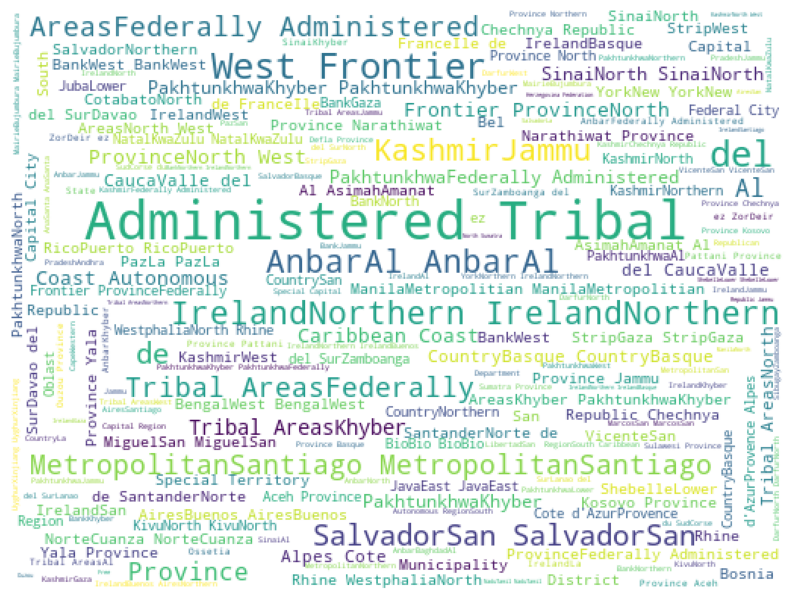

In [73]:
from wordcloud import WordCloud
from scipy import signal
cities = df.State.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white', width=512, height=384).generate(''.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

### Year wise Attacks

In [32]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


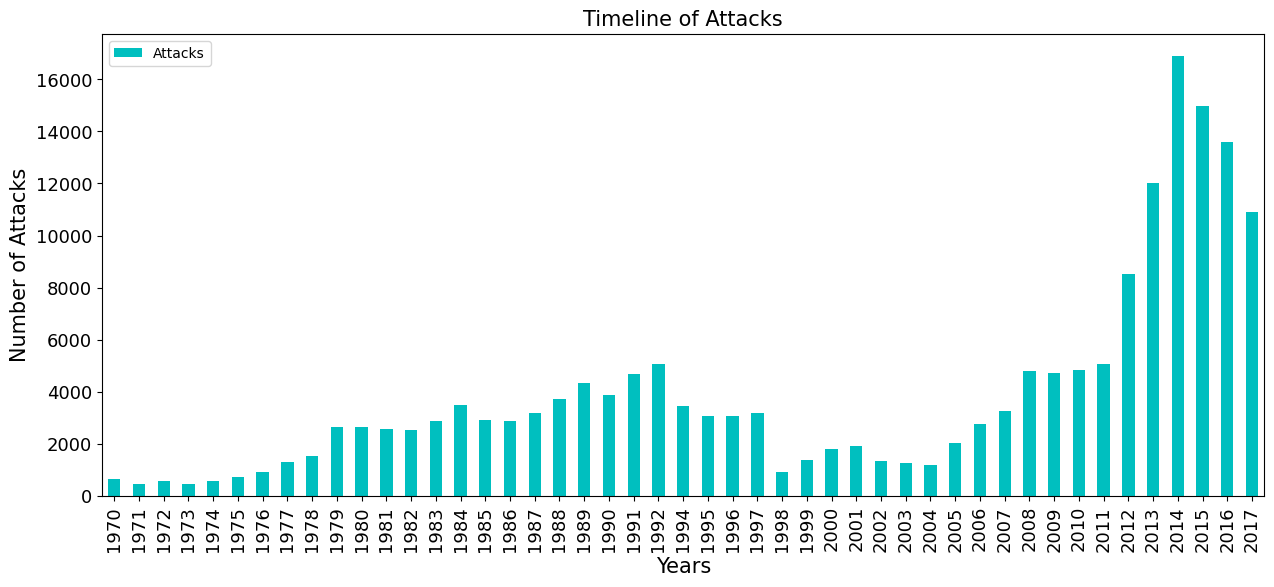

In [33]:
attacks.plot(kind="bar",color="c",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

### Region wise Attacks

In [34]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


In [35]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

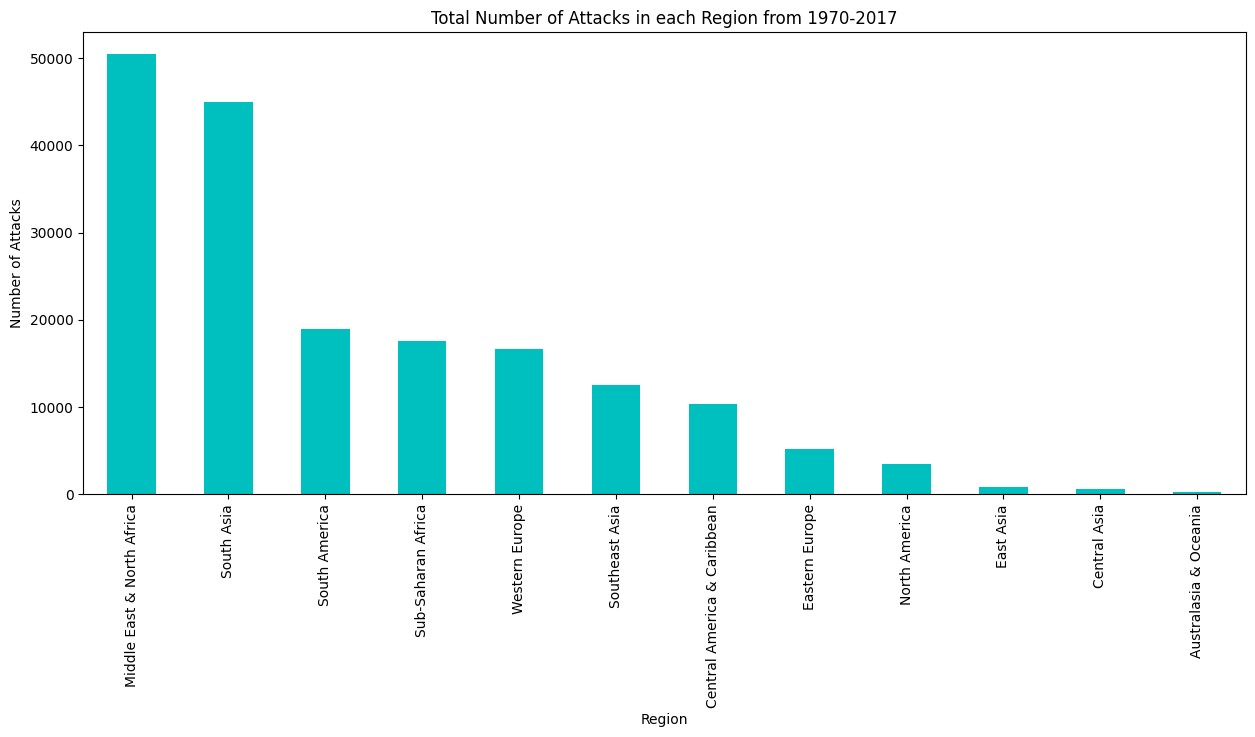

In [40]:
ra.plot(kind="bar",figsize=(15,6), color="c")
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

In [37]:
ct=df["Country"].value_counts().head(10)
ct

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

### Country wise Attacks

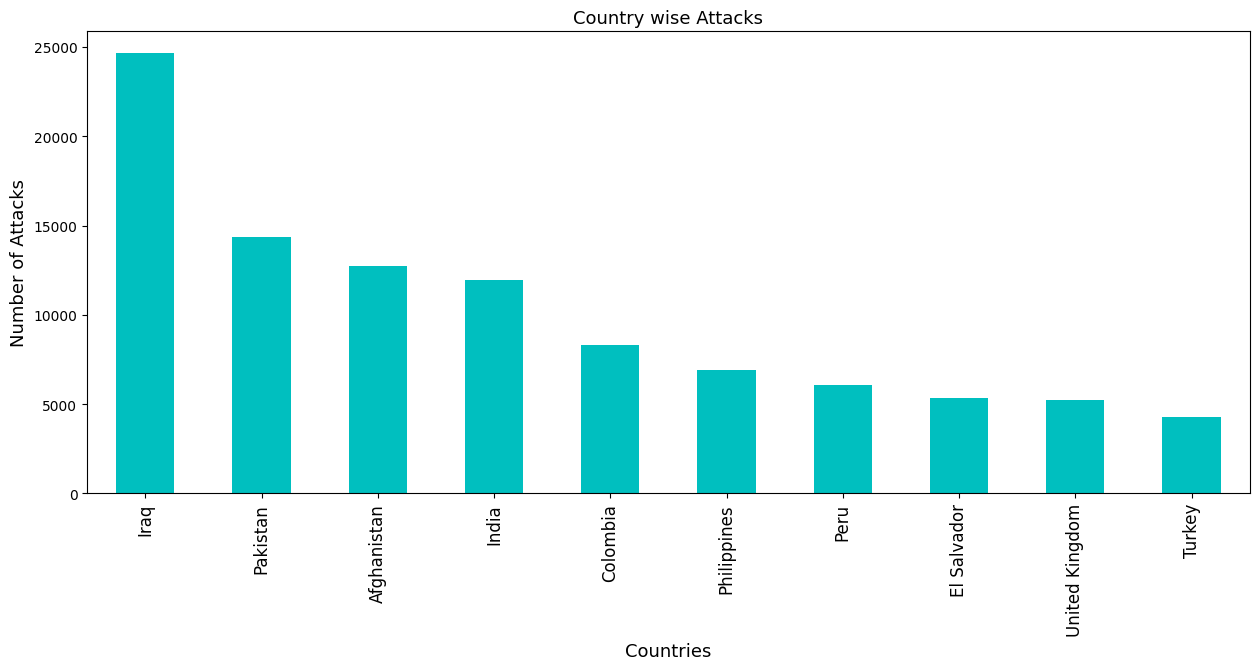

In [41]:
ct.plot(kind="bar",color="c",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

### City wise Attacks

In [42]:
city=df["City"].value_counts()[1:11]
city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

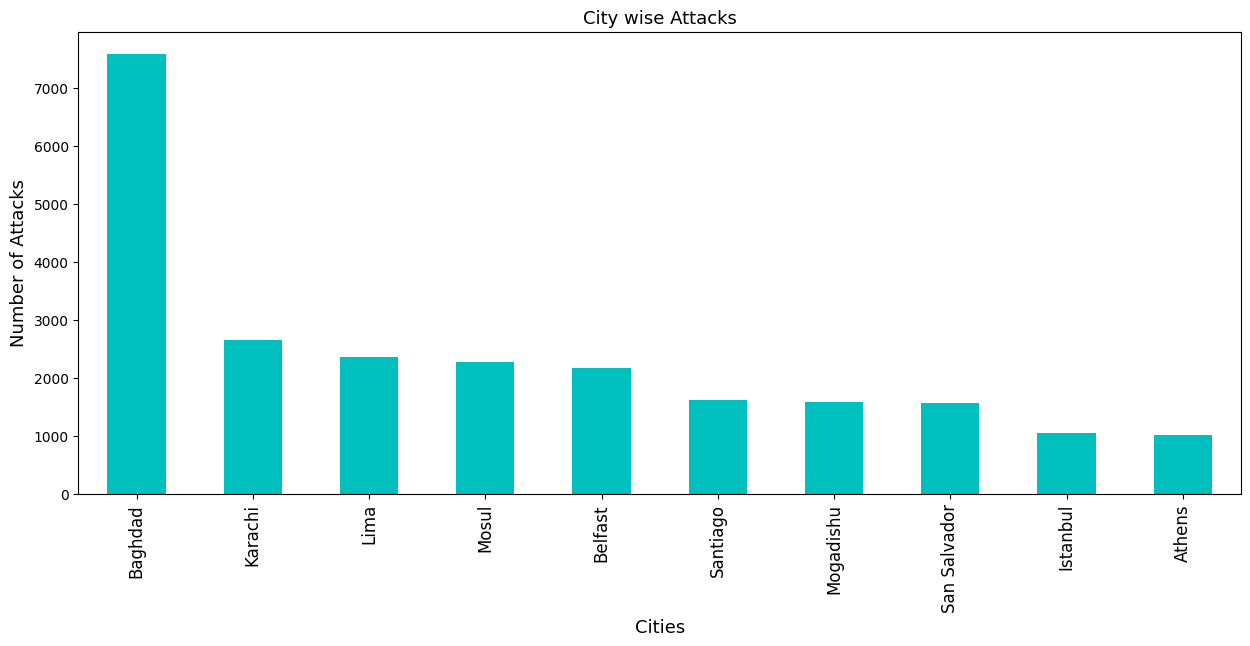

In [43]:
city.plot(kind="bar",color="c",figsize=(15,6))
plt.title("City wise Attacks",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

### Terrorist group wise Attacks

In [44]:
grp=df["Group Name"].value_counts()[1:10]
grp

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group Name, dtype: int64

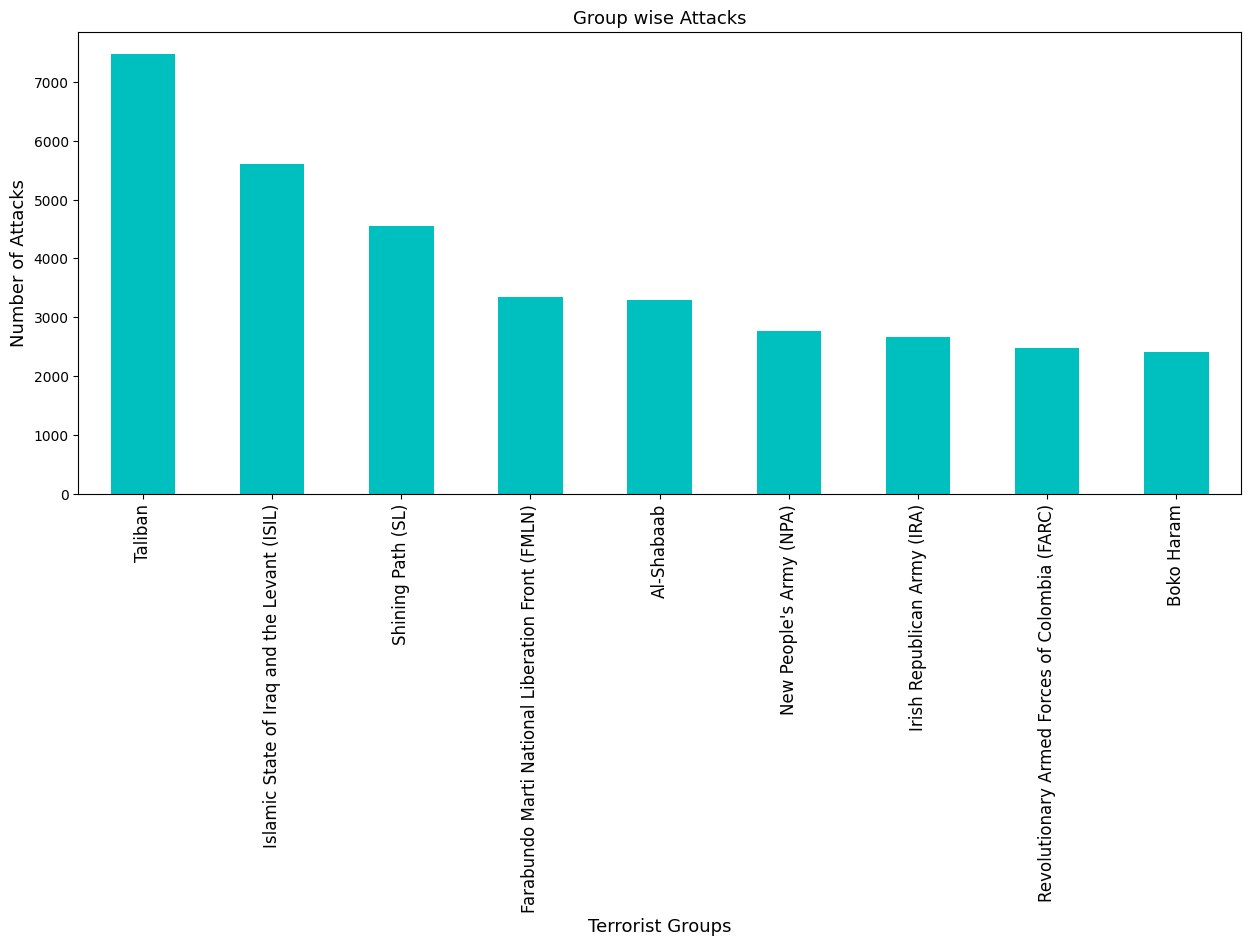

In [45]:
grp.plot(kind="bar",color="c",figsize=(15,6))
plt.title("Group wise Attacks",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

### Attack Type wise Attacks

In [46]:
at=df["Attack Type"].value_counts()
at

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack Type, dtype: int64

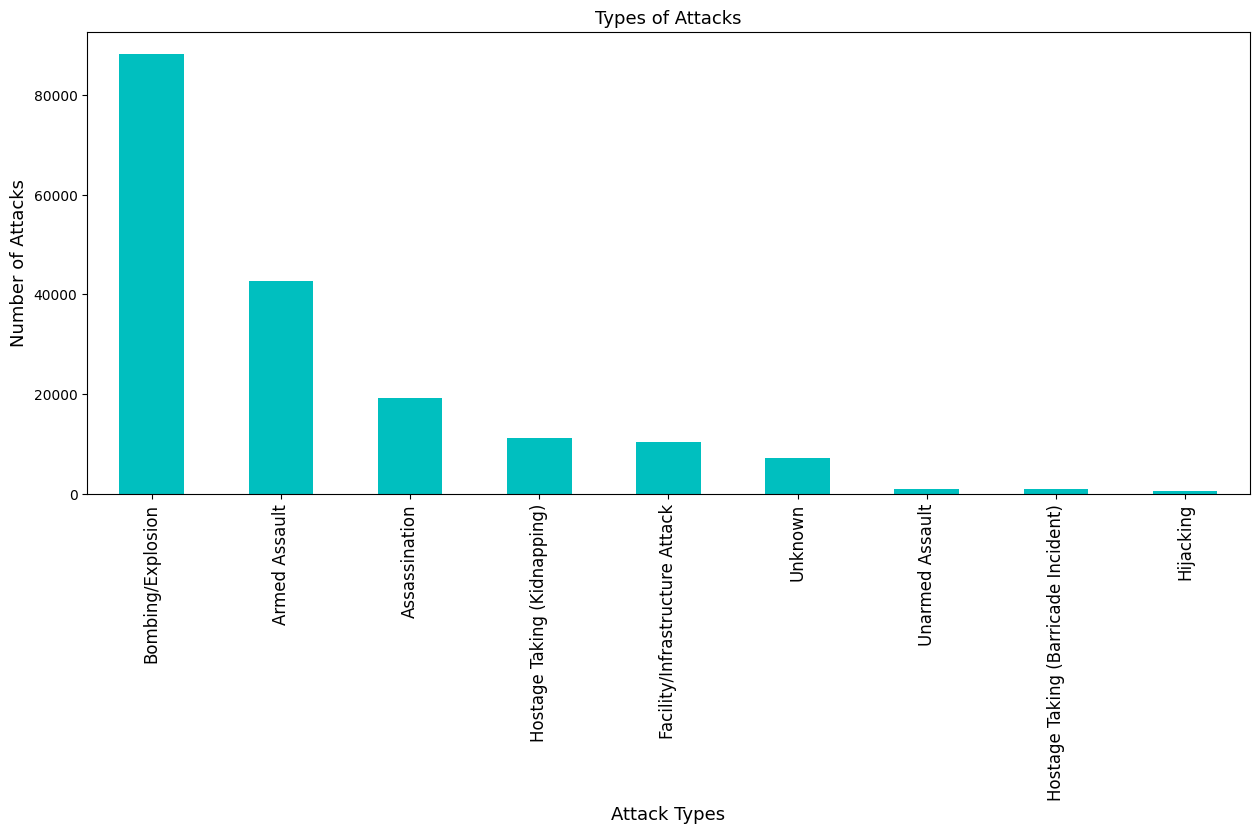

In [47]:
at.plot(kind="bar",color="c",figsize=(15,6))
plt.title("Types of Attacks",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

### Target Type wise Attacks

In [48]:
ta=df["Target Type"].value_counts()
ta

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target Type, dtype: int64

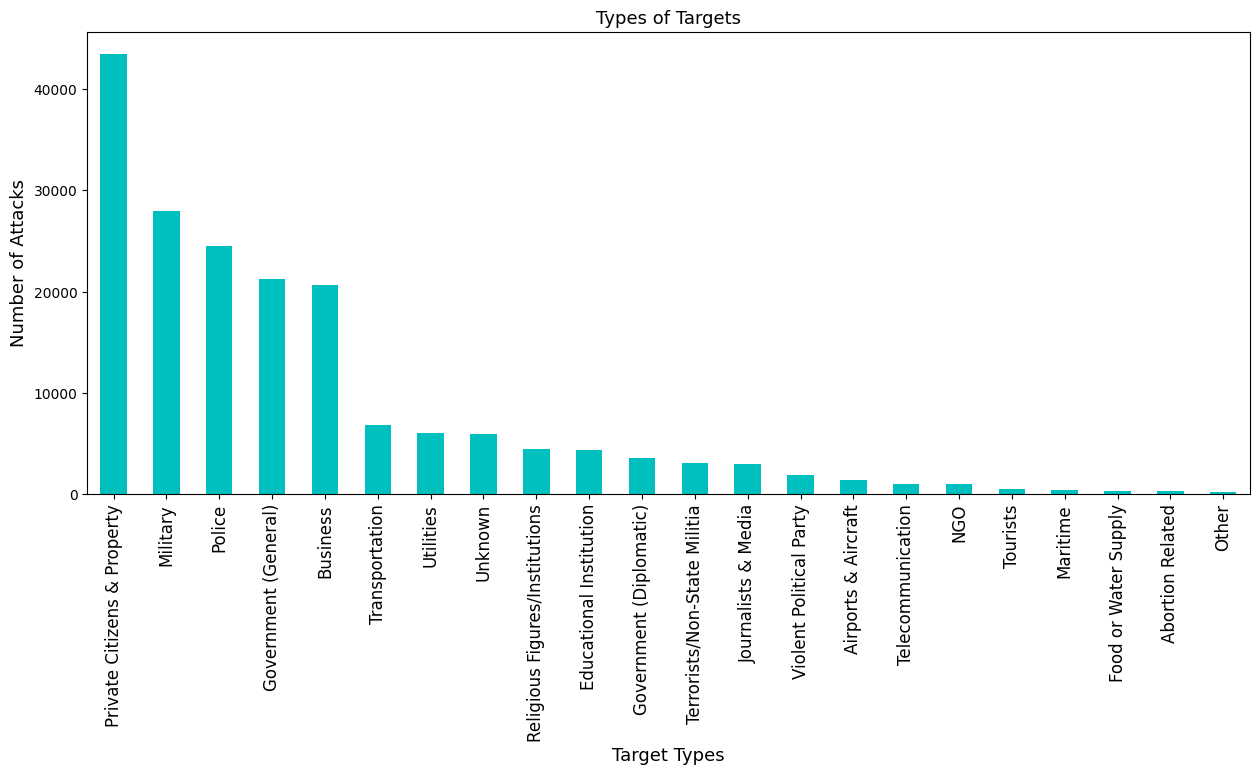

In [49]:
ta.plot(kind="bar",color="c",figsize=(15,6))
plt.title("Types of Targets",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

### Group + Country wise

In [50]:
gca=df[["Group Name","Country"]].value_counts().drop("Unknown")
gca.head(10)

Group Name                                        Country       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
dtype: int64

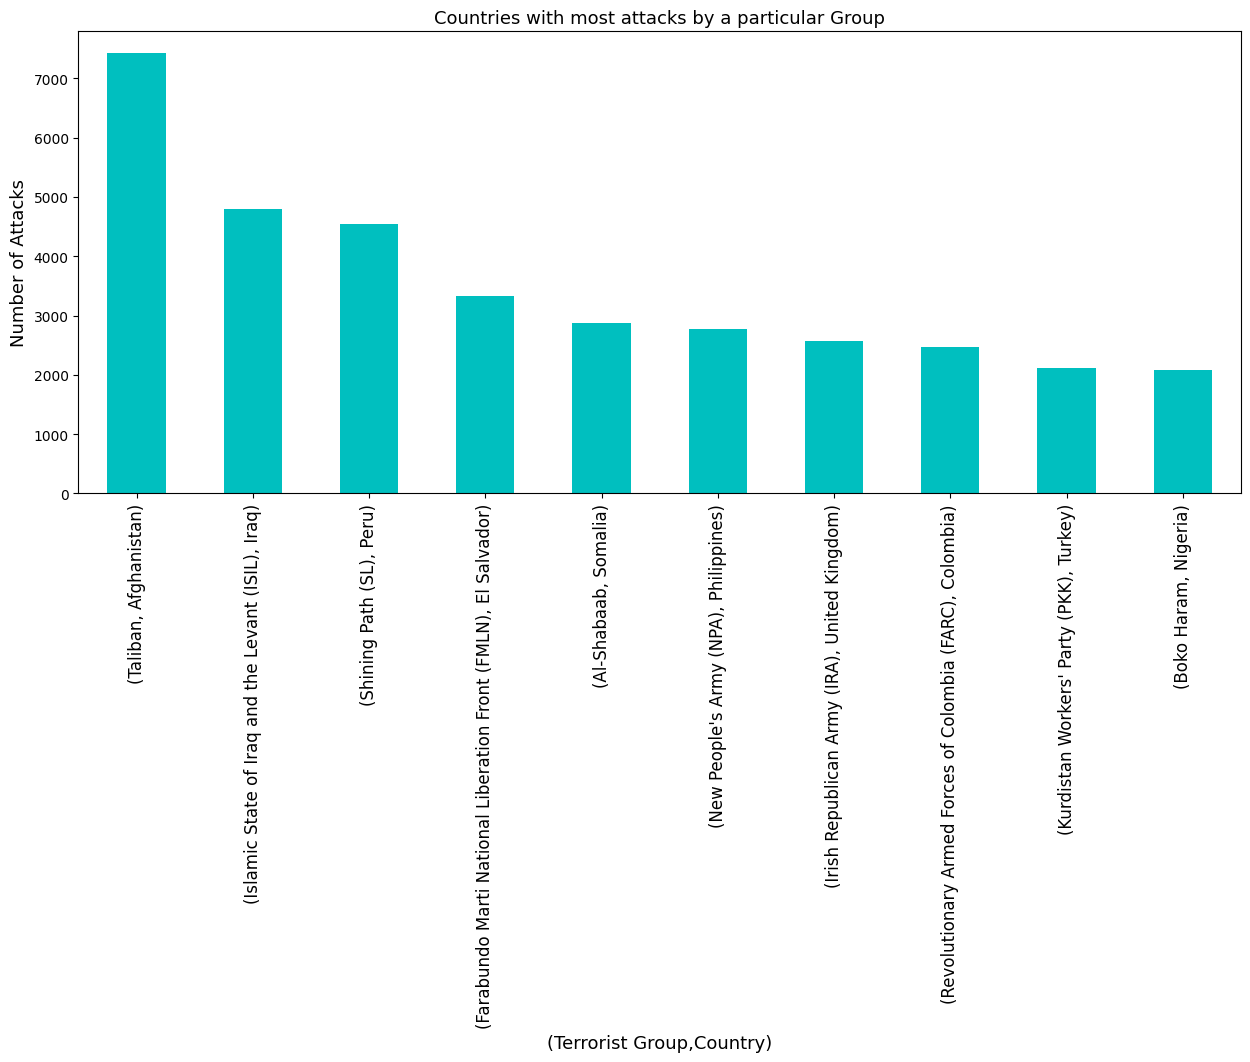

In [51]:
gca.head(10).plot(kind="bar",color="c",figsize=(15,6))
plt.title("Countries with most attacks by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

### CONCLUSION :

1. Year wise Attacks : <br>
  (i) Attacks <br>
    (a) Most number of attacks: 16903 in 2014 <br>
    (b) Least number of attacks: 471 in 1971 <br>
        
2. Region wise Attacks : <br>
  (i) Attacks <br>
    (a) Most number of attacks: 50474 in "Middle East & North Africa" <br>
    (b) Least number of attacks: 282 in "Australasia & Oceania" <br>
        
3. Country wise Attacks [Top 10] : <br>
  (i) Attacks <br>
    (a) Most number of attacks: 24636 in "Iraq" <br>
    (b) Least number of attacks: 4292 in "Turkey" <br>
        
4. City wise Attacks [Top 10] : <br>
  (i) Attacks <br>
    (a) Most number of attacks: 7589 in "Baghdad" <br>
    (b) Least number of attacks: 1019 in "Athens" <br>
        
5. Terrorist Group wise Attacks [Top 10] : <br>
  (i) Attacks <br>
    (a) Most number of attacks : 7478 by "Taliban" <br>
    (b) Least number of attacks : 2418 by "Boko Haram" <br>
        
6. Attack Type wise Attacks: <br>
  (i) Attacks <br>
    (a) Most number of attacks : 88255 by "Bombing/Explosion" <br>
    (b) Least number of attacks : 659 by "Hijacking" <br>
        
7. Target Type wise Attacks: <br>
  (i) Attacks <br>
    (a) Most number of attacks : 43511 over "Private Citizens & Property" <br>
    (b) Least number of attacks : 263 over "Abortion Related" <br>
        
8. Group and Country wise Attacks [Top 10] : <br>
  (i) Attacks <br>
    (a) Most number of attacks : 7423 by "Taliban" in "Afghanistan" <br>
    (b) Least number of attacks : 2087 by "Boko Haram" in "Nigeria" <br>